In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5])
Y = np.array([25,35,45,50,60])

x_mean = np.mean(X)
y_mean = np.mean(Y)

numerator = sum((X - x_mean) * (Y - y_mean))
denominator = sum((X - x_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - slope * x_mean

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

y_pred = intercept + slope * X

Slope: 8.5
Intercept: 17.5


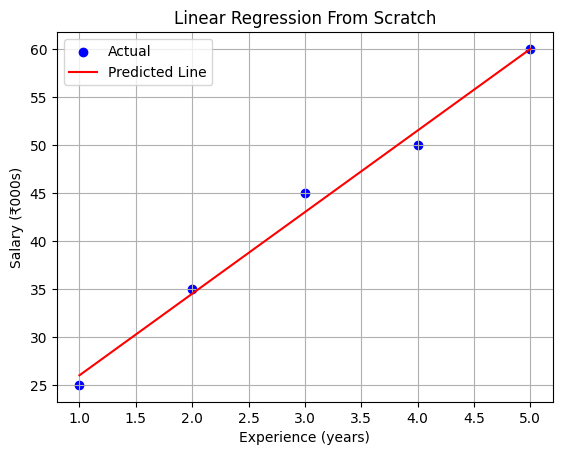

In [7]:
plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted Line')
plt.xlabel("Experience (years)")
plt.ylabel("Salary (₹000s)")
plt.title("Linear Regression From Scratch")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
new_exp = 6
predicted_salary = intercept + slope * new_exp
print(f"Predicted Salary for 6 years experience: ₹{predicted_salary:.2f}K")

Predicted Salary for 6 years experience: ₹68.50K


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([[1], [2], [3], [4], [5]])
Y = np.array([24,35,45,50,60])

model = LinearRegression()
model.fit(X,Y)

print(f"Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {model.score(X, Y):.4f}")  # r²

y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted Line')
plt.xlabel("Experience (years)")
plt.ylabel("Salary (₹000s)")
plt.title("Linear Regression (scikit-learn)")
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [10]:
new_exp = np.array([[6]])
pred_salary = model.predict(new_exp)
print(f"Predicted salary for 6 years experience: ₹{pred_salary[0]:.2f}K")

AttributeError: 'LinReg' object has no attribute 'predict'

In [11]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer
    
model = LinReg()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                         lr=0.01)

test_split = int(0.7*len(X))
X_train, y_train, X_test, y_test = X[:test_split], Y[:test_split], X[test_split:], Y[test_split:]

torch.manual_seed(42)
epochs = 10

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch%10==0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

TypeError: 'int' object is not callable